In [23]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Numerical Error

Truncation error is due to calculating a function out to a certain order using a taylor series.  All terms not included in the expansion contribute error.

Rounding error is due to the computer's inability to represent numbers beyond a certain precision.  This is the machine error. It's typically ~ 1e-16 for floats.

In [1]:
7./3. - 4./3. - 1

2.220446049250313e-16

# Numerical integration

## simple method

In [4]:
# let's look at how to define ranges.  There are N slices. And there are N+1 points including the endpoints
a = 0.0
b = 0.5*pi
N = 10
h = (b-a)/N
print(h)

0.15707963267948966


In [3]:
xs = arange(a, b, h)
xs
#missing b at the end!

array([0.        , 0.15707963, 0.31415927, 0.4712389 , 0.62831853,
       0.78539816, 0.9424778 , 1.09955743, 1.25663706, 1.41371669])

In [5]:
xs = linspace(a, b, N)
xs
#this has the wrong h!!

array([0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
       0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633])

In [7]:
xs = linspace(a, b, N+1)
xs
# this has correct h and a, b

array([0.        , 0.15707963, 0.31415927, 0.4712389 , 0.62831853,
       0.78539816, 0.9424778 , 1.09955743, 1.25663706, 1.41371669,
       1.57079633])

In [3]:
# left-sided Rieman sum
def lsum(f, h):
    return sum(f*h)

In [5]:
Nslice = array(logspace(1, 6, 6, base = 10), dtype=int)
# or
Nslice = array([10**i for i in range(1,7)])

x0 = 0.0
xf = 0.5*pi

hs = []
errs = []
for N in Nslice:
    h = (xf-x0)/N
    hs.append(h)
    xs = linspace(x0, xf, N+1)
    fs = sin(xs[:N])  # only need the N left most points
    errs.append(abs( 1.0 - lsum(fs, h)))

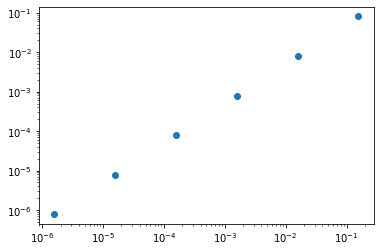

In [11]:
plot(hs, errs, 'o')
xscale('log')
yscale('log')
xlabel('h')
ylabel('absolute error')

In [12]:
polyfit(log(hs), log(errs), 1)
# so the slope ~ 1, which means that the exponent, alpha ~ 1.0

array([ 1.00170415, -0.67538975])

In [13]:
# syzygy can only handle 1e-7 i.e. 1e7 points for some reason
N = int(1e7)
h = 0.5*pi/N
xs = linspace(0.0, 0.5*pi, N+1)
fs = sin(xs[:N])
lsum(fs, h)

0.9999999214601827

## trapezoid rule

In [25]:
import scipy.integrate as integrate

In [15]:
Nslice = array(logspace(1, 6, 6, base = 10), dtype=int)

x0 = 0.0
xf = 0.5*pi

hs = []
errs = []
for N in Nslice:
    h = (xf-x0)/N
    hs.append(h)
    xs = linspace(x0, xf, N+1)
    fs = sin(xs)  # note now we're using all N+1 points
    errs.append(abs( 1.0 - integrate.trapz(fs, dx=h)))


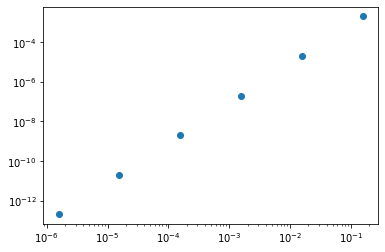

In [16]:
plot(hs, errs, 'o')
xscale('log')
yscale('log')
xlabel('h')
ylabel('absolute error')

In [17]:
polyfit(log(hs), log(errs),1)
# so error goes as h^2

array([ 1.99985906, -2.48546129])

## Simpson's rule

In [18]:
# need even number of slices for Simpson.  so use base=2.
# and you don't need h to be that small as you will see this method is very accurate for even largish dh

Nslice = array(logspace(3, 11, 9, base = 2), dtype=int)
Nslice = [2**i for i in range(3, 12)]

x0 = 0.0
xf = 0.5*pi

hs = []
errs = []
for N in Nslice:
    h = (xf-x0)/(N)
    hs.append(h)
    xs = linspace(x0, xf, N+1)
    fs = sin(xs)  # note now we're using all N where N is even
    errs.append(abs( 1.0 - integrate.simps(fs, dx=h)))


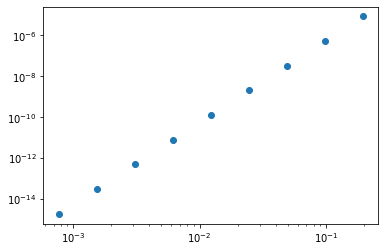

In [19]:
plot(hs, errs, 'o')
xscale('log')
yscale('log')
xlabel('h')
ylabel('absolute error')

In [20]:
polyfit(log(hs), log(errs),1)
# so the error now goes as h^4 !!!!

array([ 4.008443  , -5.16437725])

In [24]:
# timing function
from timeit import default_timer

In [21]:
# simple err ~ h
h = 1e-7

N = int(0.5*pi/h)
print('simple', N)
xs = linspace(0.0, 0.5*pi, N+1)
dh = xs[1]-xs[0]
start = default_timer()
rslt = lsum(sin(xs[:N]), dh)
end = default_timer()
print('time: %e  err: %e' % (end-start, abs(1.0-rslt)))

# simple err ~ h^2
h = sqrt(1e-7)

N = int(0.5*pi/h)
print('trapz', N)
xs = linspace(0.0, 0.5*pi, N+1)
dh = xs[1]-xs[0]
start = default_timer()
rslt = integrate.trapz(sin(xs), dx=dh)
end = default_timer()
print('time: %e  err: %e' % (end-start, abs(1.0-rslt)))

# simpson's err ~ h^4
h = (1e-7)**0.25

N = int(0.5*pi/h)
print('simpson', N)
xs = linspace(0.0, 0.5*pi, N+1)
dh = xs[1]-xs[0]
start = default_timer()
rslt = integrate.simps(sin(xs), dx=dh)
end = default_timer()
print('time: %e  err: %e' % (end-start, abs(1.0-rslt)))

simple 15707963
time: 3.273089e-01  err: 5.000000e-08
trapz 4967
time: 9.385869e-04  err: 8.334320e-09
simpson 88
time: 1.292229e-04  err: 5.640177e-10


## Other methods

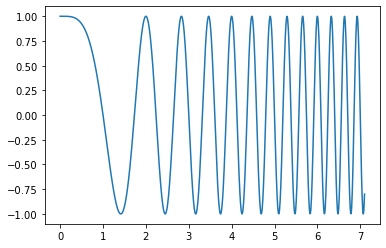

In [24]:
# evaluate the integral of cos((pi/2) x^2) over 0 <= x <= 7.1

xs = linspace(0, 7.1, 1000)
plot(xs, cos(0.5*pi*xs*xs))

This function oscillates substantially, need to use very fine set of points to integrate it using equally spaced points

In [2]:
import scipy.special as spec

In [27]:
?spec.fresnel

Two values are returned.

In [49]:
S, C = spec.fresnel(7.1)
print(C)
# we want C not S

0.47331119669659066


In [50]:
# integrate the above using Simpson's method and find h needed to give err ~ 1e-8

# integrate cos(0.5*pi*x*x) over 0 <= x <= 7.1 using different # of slices

Nslices = array([2**i for i in range(1, 12)])  # log spaced points

x0 = 0.0
xf = 7.1

S, C = spec.fresnel(xf)  # correct value of the fresnel integral - we want the S value

hs = []
errs = []
for N in Nslices:
    h = (xf-x0)/N
    hs.append(h)
    
    xs = linspace(x0, xf, N+1)
    fs = cos(0.5*pi*xs*xs)   # for trapz need to evaluate function at all N+1 points
    
    rslt = integrate.simps(fs, xs)
    
    # actual value of integral of sinx on this interval = 1.0
    
    error = abs(C - rslt)
    errs.append(error)

Text(0, 0.5, 'absolute error')

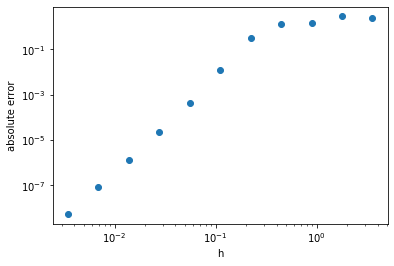

In [51]:
plot(hs, errs, 'o')
xscale('log')
yscale('log')
xlabel('h')
ylabel('absolute error')

To get an error ~ 1e-8 looks like we need an h ~ 1e-3, so that would give N ~ 1000 pts.

## Fixed quadrature

In [37]:
?integrate.fixed_quad

In [36]:
# need to define our function to pass to fixed_quad

def f(x):
    return cos(0.5*pi*x*x)

# or could do it using python's lambda notation

# f = lambda x:  cos(0.5*pi*x*x)

In [41]:
rslt = integrate.fixed_quad(f, x0, xf, n=35)
print(rslt[0])

0.47349928719096074


In [54]:
# integrate the above using quadrature method and find h needed to give err ~ 1e-8

# integrate cos(0.5*pi*x*x) over 0 <= x <= 7.1 using different # of slices

Nslices = array([2**i for i in range(1, 8)])  # log spaced points

x0 = 0.0
xf = 7.1

S, C = spec.fresnel(xf)  # correct value of the fresnel integral - we want the S value

hs = []
errs = []
for N in Nslices:
    h = (xf-x0)/N
    hs.append(h)
    
    rslt = integrate.fixed_quad(f, x0, xf, n=N)
    
    # actual value of integral of sinx on this interval = 1.0
    
    error = abs(C - rslt[0])
    errs.append(error)

Text(0, 0.5, 'absolute error')

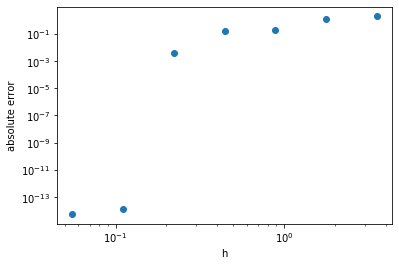

In [55]:
plot(hs, errs, 'o')
xscale('log')
yscale('log')
xlabel('h')
ylabel('absolute error')

So with fixed quadrature with an h ~ 1e-1 we get an error < 1e-8. So we need N~10 points only with fixed quadrature

In [57]:
# use integrate.quadrature to automatically find the N to generate a certain error tolerance
?integrate.quadrature

In [58]:
integrate.quadrature(f, x0, xf, tol=1e-8)

(0.4733111981263692, 9.812996526470386e-10)

In [63]:
#Lastly integrate exp(-x*x/2) from -inf to inf using integrate.quad
?integrate.quad

In [60]:
def f(x):
    return exp(-0.5*x*x)

In [64]:
integrate.quad(f, -inf, inf, epsabs=1e-8)

(2.5066282746309994, 2.5512942192316024e-08)

## Monte Carlo Integration

In [70]:
def f(x):
    return cos(0.5*pi*x*x)  # fresnel integrand

In [74]:
# do do montecarlo integration, we just need to compute the average of the function using a randomly sampled number of points

x0 = 0.0
xf = 7.1

S, C = spec.fresnel(xf)

Npts = array([10**i for i in range(1, 8)])   # number of samples to draw

errs = []
for N in Npts:
    
    xs = x0 + (xf-x0)*random.random(N)    # this generates N random points between x0 and xf
    
    fs = f(xs)   # the function values at these random points
    
    rslt = (xf-x0)*mean(fs)    # definition of integral using the average of function

    errs.append(abs(C - rslt))

Text(0, 0.5, 'absolute error')

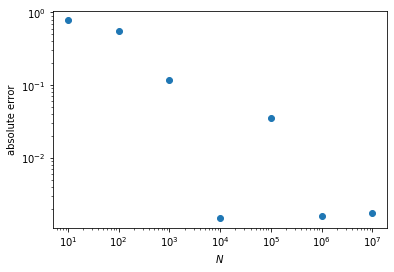

In [75]:
plot(Npts, errs, 'o')
xscale('log')
yscale('log')
xlabel(r'$N$')
ylabel('absolute error')

So the error is going down with more N, but it fluctuates.  And it's not super low.  This isn't a great method for this particular integral but it is for evaluating high dimensional integrals.

## Volume of 5d sphere (extra problem - not graded but shows power of MC integration)

In [7]:
# volume of 5d sphere with R=1 (from wikipedia)

n = 5
V5d = (pi)**(0.5*n)/spec.gamma(0.5*n+1.0)
print(V5d)

5.263789013914324


In [8]:
# sanity check, does this work in 3d
n = 3
V3d = (pi)**(0.5*n)/spec.gamma(0.5*n+1.0)
print(V3d, 4./3.*pi)

4.188790204786391 4.1887902047863905


In [14]:
def f5d(r):   # r has the shape (N, D) where N is the # of points and D is the dimensionality
    r2 = sum(r*r, axis=1)  # calculate r^2 = x1*x1 + x2*x2 + x3*x3 + ...
    # want r2 <= 1.0
    rslt = zeros(len(r))
    rslt[r2 <= 1.0] = 1.0   # all points within sphere have value = 1.0, all points > 1.0 will remain = 0.0
    return rslt

In [23]:
# do do montecarlo integration, we just need to compute the average of the function using a randomly sampled number of points

Npts = array([10**i for i in range(1, 6)])   # number of samples to draw

Vcube = (2.0)**5  # each side has a length = 2.0

errs = []
for N in Npts:
    
    rs = 2.0*(0.5 - random.random((N, 5)))    # this generates N random in the 5d cube from -1 to 1
    
    fs = f5d(rs)   # the function values at these random points
    
    rslt = Vcube*mean(fs)    # definition of integral using the average of function
    print(N, rslt, V5d)
    
    errs.append(abs(V5d - rslt))

10 3.2 5.263789013914324
100 5.76 5.263789013914324
1000 5.408 5.263789013914324
10000 5.1264 5.263789013914324
100000 5.22016 5.263789013914324


Text(0, 0.5, 'absolute error')

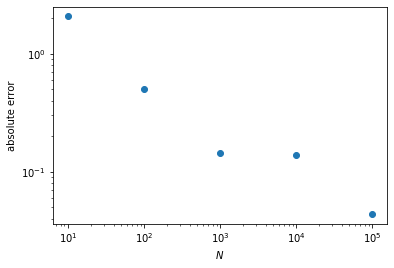

In [24]:
plot(Npts, errs, 'o')
xscale('log')
yscale('log')
xlabel(r'$N$')
ylabel('absolute error')

So with as few as 100,000 pts we've already got a reasonable estimate of the volume.  Way less than you'd need if you were to do a grid.  The error should go down as 1/sqrt(N), since our estimate of the average has sqrt(N) noise.

# Numerical differentiation

In [26]:
# Numerical differentiation, forward difference

hs = [10.0**(-i) for i in range(1, 16)]

x = 1.0

errs = []
for h in hs:
    dfdx = ((x+h)**0.8 - (x)**0.8)/h
    errs.append(abs( dfdx - 0.8*(x)**(-0.2)))

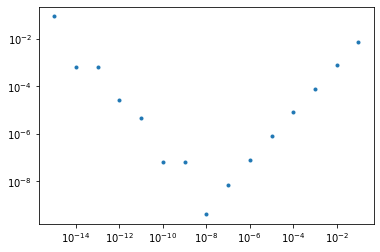

In [27]:
plot(hs, errs, '.')
xscale('log')
yscale('log')
xlabel('h')
ylabel('absolute error')

Centered difference error dependence:
\begin{equation}
f(x + h) = f(x) + f'(x) h + 1/2 f''(x) h^2 + O(h^3)
\end{equation}
and
\begin{equation}
f(x - h) = f(x) - f'(x) h + 1/2 f''(x) h^2 + O(h^3)
\end{equation}
subtract these equations and solve for $f'(x)$ gives the centered difference formula and an error that goes as $O(h^3/h) = O(h^2)$.

In [28]:
# Numerical differentiation, centered difference

hs = [10.0**(-i) for i in range(1, 16)]

x = 1.0

errs = []
for h in hs:
    dfdx = 0.5*((x+h)**0.8 - (x-h)**0.8)/h
    errs.append(abs( dfdx - 0.8*(x)**(-0.2)))

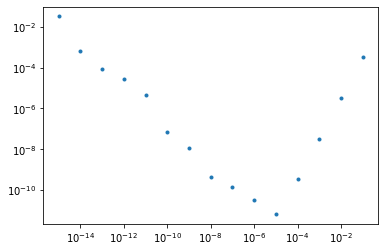

In [29]:
plot(hs, errs, '.')
xscale('log')
yscale('log')
xlabel('h')
ylabel('absolute error')

# Euler method

In [30]:
# free fall
def dydt(t, y):  # note y is an array: y = [x(t), v(t)]
    # returns [dx/dt, dv/dt]
    x = y[0]
    v = y[1]
    return array([v, -9.80])

In [31]:
# euler:  y(t+dt) = y(t) + dydt*dt

dt = 0.01
Nsteps = 100

y0 = array([1.0, 5.0])  # initial conditions
ys = [y0]  # store my position and velocity

t = 0.0
ts = [t]
for i in range(Nsteps):
    yp = ys[-1] + dt*dydt(t, ys[-1])
    ys.append(yp)
    t += dt
    ts.append(t)
ys = array(ys)
ts = array(ts)

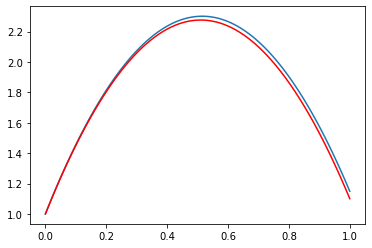

In [32]:
plot(ts, ys[:,0])
plot(ts, 1.0 + 5.0*ts - 0.5*9.8*ts*ts,'r') #exact solution

# Built in Python ODE solver

In [33]:
from scipy.integrate import solve_ivp

In [34]:
sol = solve_ivp(dydt, (0.0, 1.0), (1.0, 5.0))

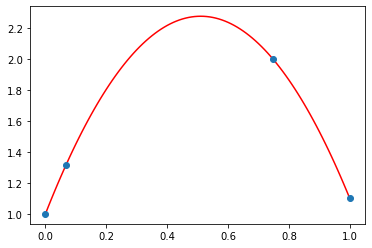

In [35]:
plot(ts, 1.0 + 5.0*ts - 0.5*9.8*ts*ts,'r') #exact solution
plot(sol.t, sol.y[0], 'o')
# the points look great, they fall on the trajectory, but why are there so few?

In [ ]:
# use t_eval

In [38]:
ts = arange(0.0, 1.01, 0.01)
sol = solve_ivp(dydt, (0.0, 1.0), (1.0, 5.0), t_eval = ts)

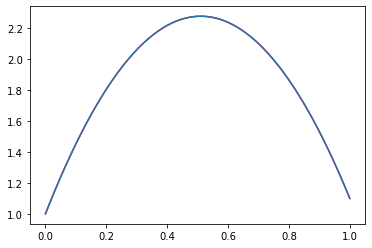

In [39]:
plot(ts, 1.0 + 5.0*ts - 0.5*9.8*ts*ts,'r') #exact solution
plot(sol.t, sol.y[0])
# the error is now not even visible

# driven damped oscillator

Need to solve
\begin{equation}
\frac{dv}{dt} = f - 2\gamma \omega_0 v - \omega_0^2 x
\end{equation}
and
\begin{equation}
\frac{dx}{dt} = v
\end{equation}

In [40]:
# constant forcing f
def dydt(t, y, w0, gamma, f):
    # y[0] = x
    # y[1] = v
    x = y[0]
    v = y[1]
    accel = f - 2.0*gamma*w0*v - w0*w0*x
    return [v, accel]

In [52]:
# see what solving at a particular gamma gives
w0 = 2.0
gamma = 0.25
f = 1.0

x0 = 0.0
v0 = 0.0

t0 = 0.0
tf = 10.0
dt = 0.01
ts = arange(t0, tf+dt, dt)
sol = solve_ivp(lambda t, y: dydt(t, y, w0, gamma, f), (t0, tf), (x0, v0), t_eval = ts)

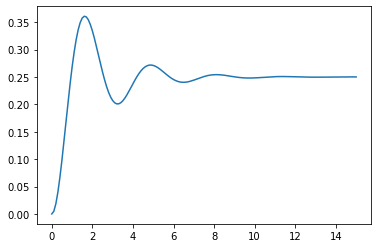

In [53]:
plot(sol.t, sol.y[0])

Text(0, 0.5, 'position')

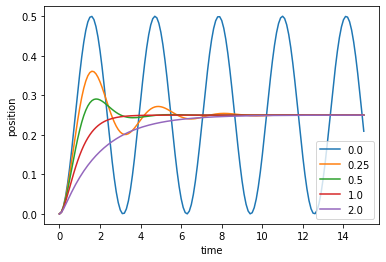

In [55]:
# see what solving at a particular gamma gives
w0 = 2.0
gammas = [0.0, 0.25, 0.5, 1.0, 2.0]
f = 1.0

ts = arange(0.0, 15.01, 0.1)
for gamma in gammas:
    sol = solve_ivp(lambda t, y: dydt(t, y, w0, gamma, f), (0.0, 15.0), (0.0, 0.0), t_eval = ts)
    plot(sol.t, sol.y[0])
legend(gammas, loc=0)
xlabel('time')
ylabel('position')

At c ~ 1.0 you get critical damping above which you get overdamping.

## Driven oscillator

In [56]:
# driven oscillator
def dydt(t, y, w0, gamma, f, w):
    # y[0] = x
    # y[1] = v
    x = y[0]
    v = y[1]
    accel = f*cos(w*t) - 2.0*gamma*w0*v - w0*w0*x
    return [v, accel]

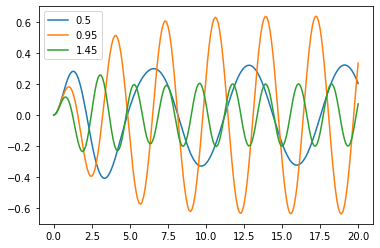

In [59]:
# see what solving at a particular gamma gives
w0 = 2.0
ws = [0.5, 0.95, 1.45]
gamma = 0.2
f = 1.0

T = 20.0
dt = 0.1

ts = arange(0.0, T+dt, dt)
for w in ws:
    sol = solve_ivp(lambda t, y: dydt(t, y, w0, gamma, f, w*w0), (0.0, T), (0.0, 0.0), t_eval = ts)
    plot(sol.t, sol.y[0])
legend(ws, loc=0)

The frequency of the oscillations increases with $\omega$ but the amplitude initially increases and then decreases with $\omega$.

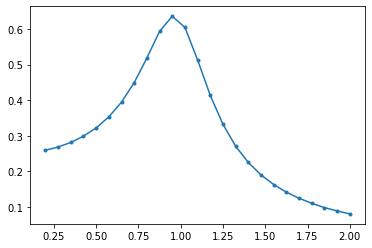

In [62]:
# now find amplitude.  Need to find 0.5*(max(x) - min(x)) after the initial transient has gone away.  Taking time after T/2 
# seems good

w0 = 2.0
ws = linspace(0.2, 2.0, 25)  # define the driving frequencies
gamma = 0.2
f = 1.0

T = 30.0
dt = 0.1

ts = arange(0.0, T+dt, dt)
Thalf = int(0.5*len(ts))
amps = []
for w in ws:
    sol = solve_ivp(lambda t, y: dydt(t, y, w0, gamma, f, w*w0), (0.0, T), (0.0, 0.0), t_eval = ts)
    A = 0.5*(max(sol.y[0][Thalf:]) - min(sol.y[0][Thalf:]))
    amps.append(A)
plot(ws, amps, '.-')

Text(0.5, 0, 'drive frequency')

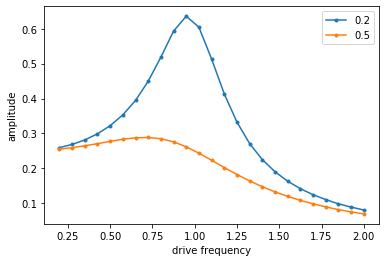

In [64]:
# now find amplitude.  Need to find 0.5*(max(x) - min(x)) after the initial transient has gone away.  Taking time after T/2 
# seems good

w0 = 2.0
ws = linspace(0.2, 2.0, 25)    # driving frequencies
gammas = [0.2, 0.5]    # solve it now at 2 difft values of gamma
f = 1.0

T = 30.0
dt = 0.1

ts = arange(0.0, T+dt, dt)
Thalf = int(0.5*len(ts))

for gamma in gammas:
    amps = []
    for w in ws:
        sol = solve_ivp(lambda t, y: dydt(t, y, w0, gamma, f, w*w0), (0.0, T), (0.0, 0.0), t_eval = ts)
        A = 0.5*(max(sol.y[0][Thalf:]) - min(sol.y[0][Thalf:]))
        amps.append(A)
    plot(ws, amps, '.-')
legend(gammas, loc=0)
ylabel('amplitude')
xlabel('drive frequency')

So as damping increases the resonance shifts to the left and gets smaller (i.e. the amplitude is not as big). Note the natural frequency of the system was $\omega_0 = 2.0$.

# Lorenz attractor

In [66]:
def lorenz(t, y, r, s, b):
        # x = y[0], y = y[1], z = y[2]
        # return dx/dt, dy/dt, dz/dt
        return array([s*(y[1]-y[0]), r*y[0] - y[1] - y[0]*y[2], y[0]*y[1] - b*y[2]])

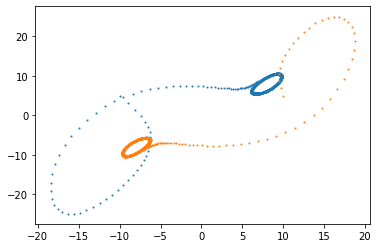

In [67]:
# non-chaotic regime
r = 25.0
s = 10.0
b = 8./3.

ts = linspace(0.0, 8.0, 1000)
sol = solve_ivp(lambda t, y: lorenz(t, y, r, s, b), (0.0, 8.0), (-10.0, 5.0, 0.0), t_eval=ts)
scatter(sol.y[0], sol.y[1], s=1)

sol = solve_ivp(lambda t, y: lorenz(t, y, r, s, b), (0.0, 8.0), (10.0, 5.0, 0.0), t_eval=ts)
scatter(sol.y[0], sol.y[1], s=1)

# it has 2 stable attractors (both limit cycles)

In [68]:
# chaotic regime
r = 75.0
s = 10.0
b = 8./3.

ts = linspace(0.0, 8.0, 1000)
sol = solve_ivp(lambda t, y: lorenz(t, y, r, s, b), (0.0, 8.0), (-10.0, 5.0, 0.0), t_eval=ts)

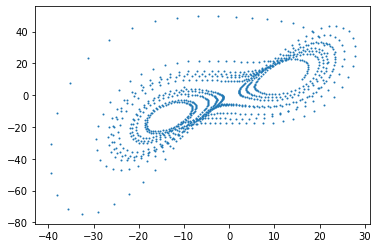

In [69]:
# system is chaotic
scatter(sol.y[0], sol.y[1], s=1)